# Regression and Other Stories: Chapter 6

In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from bambi import Model
import arviz as az
import numpy as np

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [3]:
# R is one indexed
x = np.arange(1, 21)
n = x.shape
a = .2
b = .3
sigma = .5
y = a + b*x + sigma*stats.norm().rvs(n)

In [4]:
fake = pd.DataFrame({"x":x, "y":y})

In [5]:
model = Model(fake)
results = model.fit('y ~ x', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
INFO:pymc3:Sequential sampling (4 chains in 1 job)
NUTS: [y_sd, x, Intercept]
INFO:pymc3:NUTS: [y_sd, x, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


In [6]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=False)
coefs

,Median,MAD_SD
Intercept[0],0.524,0.191
x[0],0.282,0.016
y_sd,0.574,0.071


Text(10.5, 3.485, 'y = 0.52 + 0.28 * x')

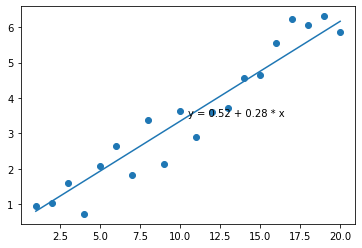

In [10]:
a_hat = coefs.loc["Intercept[0]", "Median"]
b_hat = coefs.loc["x[0]", "Median"]

fig, ax = plt.subplots()
ax.plot(x, a_hat+b_hat*x)
ax.scatter(x, y)

x_bar = x.mean()
ax.text(x_bar, a_hat+b_hat*x_bar,
       f"y = {np.round(a_hat, 2)} + {np.round(b_hat, 2)} * x")

In [11]:
earnings = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Earnings/data/earnings.csv")

In [12]:
earnings["earnk"] = earnings["earn"]/1000

In [23]:
model = Model(earnings)
results = model.fit('earnk ~ height + male', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
INFO:pymc3:Sequential sampling (4 chains in 1 job)
NUTS: [earnk_sd, male, height, Intercept]
INFO:pymc3:NUTS: [earnk_sd, male, height, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 230 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 230 seconds.
The acceptance probability does not match the target. It is 0.8817708333909873, but should be close to 0.8. Try to increase the number of tuning steps.
/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


In [25]:
coefs = az.summary(results, stat_funcs=func_dict, extend=False)
coefs

,Median,MAD_SD
Intercept[0],-25.639,7.899
height[0],0.643,0.122
male[0],10.578,1.004
earnk_sd,21.406,0.242


In [30]:
1-(coefs.loc["earnk_sd", "Median"]**2 / earnings["earnk"].std()**2)

0.09743058766144153

There is some line where variance is returned. Need to figure out what to do in bambi

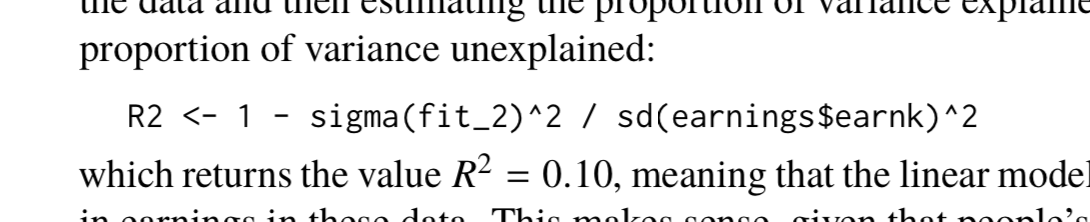

In [16]:
heights = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/PearsonLee/data/Heights.txt",
                      delimiter=" ")
heights.iloc[:5]

,daughter_height,mother_height
0,52.5,59.5
1,52.5,59.5
2,53.5,59.5
3,53.5,59.5
4,55.5,59.5


In [17]:
model = Model(heights)
results = model.fit('daughter_height ~ mother_height', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
INFO:pymc3:Sequential sampling (4 chains in 1 job)
NUTS: [daughter_height_sd, mother_height, Intercept]
INFO:pymc3:NUTS: [daughter_height_sd, mother_height, Intercept]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 86 seconds.
INFO:pymc3:Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 86 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
INFO:pymc3:Only one chain was sampled, this makes it impossible to run some convergence checks
/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


In [18]:
coefs = az.summary(results, stat_funcs=func_dict, extend=False)
coefs

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


,Median,MAD_SD
Intercept[0],29.804,0.536
mother_height[0],0.545,0.009
daughter_height_sd,2.262,0.015


In [19]:
n = heights.shape[0]
mother_height_jitt = heights["mother_height"] + stats.uniform(-.5,.5).rvs(n)
daughter_height_jitt = heights["daughter_height"] + stats.uniform(-.5,.5).rvs(n)


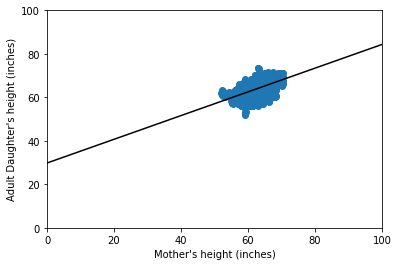

In [20]:
fig, ax = plt.subplots()
ax.scatter(mother_height_jitt, daughter_height_jitt)
ax.set_xlabel("Mother's height (inches)")
ax.set_ylabel("Adult Daughter's height (inches)")

x = np.array([0, 100])

a_hat = coefs.loc["Intercept[0]", "Median"]
b_hat = coefs.loc["mother_height[0]", "Median"]

ax.plot(x, a_hat+b_hat*x, c="black")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100);

In [21]:
n = 1000
true_ability = stats.norm(50, 10).rvs(n)
noise_1 = stats.norm(0, 10).rvs(n)
noise_2 = stats.norm(0, 10).rvs(n)
midterm = true_ability + noise_1
final = true_ability + noise_2

exams = pd.DataFrame({"midterm":midterm, "final":final})

In [22]:
model = Model(exams)
results = model.fit('final ~ midterm', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...


KeyboardInterrupt: 

In [ ]:
coefs = az.summary(results, stat_funcs=func_dict, extend=False)
coefs

In [ ]:
fig, ax = plt.subplots()
ax.scatter(midterm, final)
ax.set_xlabel("Midtern")
ax.set_ylabel("Final")
x = np.array([0, 100])

a_hat = coefs.loc["Intercept[0]", "Median"]
b_hat = coefs.loc["midterm[0]", "Median"]

ax.plot(x, a_hat+b_hat*x, c="black")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100);